# Regression Analysis

This notebook contains:
1. Importing libraries and data
2. Hypothesis Testing
3. Regression Analysis
4. Results

# 1. Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [4]:
path = 'C:/Users/Owner/OneDrive/Desktop/Data Analytics/Achievement 6'

In [5]:
df = pd.read_csv(os.path.join(path, 'WAhousing.csv'))

# Data cleaning already done in previous tasks.

Scatterplot

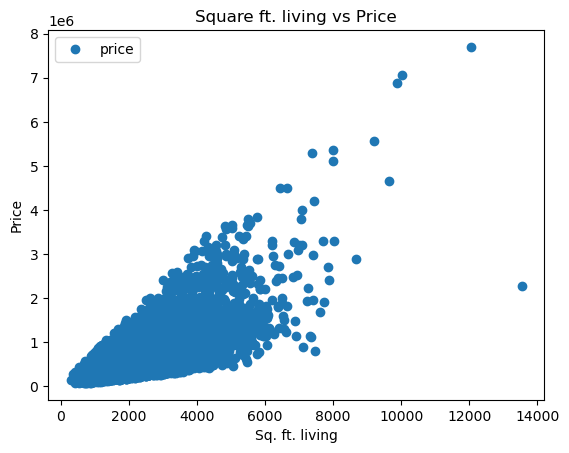

In [6]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'sqft_living', y='price',style='o') 
plt.title('Square ft. living vs Price')  
plt.xlabel('Sq. ft. living')  
plt.ylabel('Price')  
plt.show()

# 2. Hypothesis Testing: 

If amount of square ft. living increases, the price of the house increases.

In [7]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['sqft_living'].values.reshape(-1,1)
y = df['price'].values.reshape(-1,1)

In [8]:
X

array([[2140],
       [2320],
       [3597],
       ...,
       [1080],
       [ 790],
       [ 680]], dtype=int64)

In [10]:
y

array([[230000],
       [250000],
       [330000],
       ...,
       [411000],
       [395000],
       [510000]], dtype=int64)

In [11]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 3. Regression analysis

In [12]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [13]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [14]:
# Predict the values of y using X.
y_predicted = regression.predict(X_test)

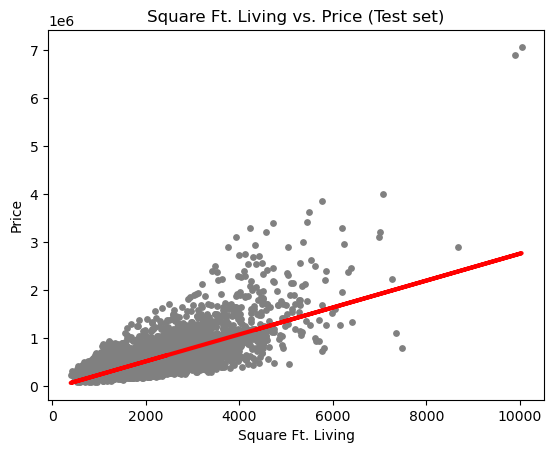

In [15]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Square Ft. Living vs. Price (Test set)')
plot_test.xlabel('Square Ft. Living')
plot_test.ylabel('Price')
plot_test.show()

The line fits very well. Square Feet of living area seems to be a good indicator for price.

In [16]:
rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [17]:
# Print the model summary statistics.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[279.92027509]]
Mean squared error:  66786678353.55261
R2 score:  0.4937847229075589


In [18]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,614905,6.323652e+05
1,309900,5.231963e+05
2,389000,5.539875e+05
3,1505000,9.318799e+05
4,625000,5.679836e+05
5,367777,5.567867e+05
6,269000,3.608425e+05
7,322500,2.740673e+05
8,89000,2.096856e+05
9,862500,8.591006e+05


Compare how the regression fits the training set.

In [19]:
y_predicted_train = regression.predict(X_train)

In [20]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [21]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[279.92027509]]
Mean squared error:  69022466324.6566
R2 score:  0.4924355242345665


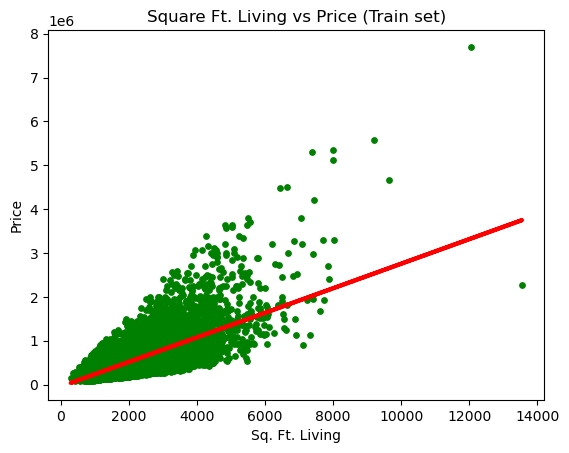

In [22]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Square Ft. Living vs Price (Train set)')
plot_test.xlabel('Sq. Ft. Living')
plot_test.ylabel('Price')
plot_test.show()

# 4. Results.
I don't believe this is a good model for prediction of price.
The line seems to fit the data well, but there are so many data points it's hard to really tell. I do believe that Sq. Ft. of living space is a good indicator to the price of a home in  King County, but I just don't think this model is a good predictor. When looking at the RMSE, it's huge. That's telling us how close the regression line is to the set of points. It seems to be way off. Additionally, the R2 score is telling us how well the model explains the variance in the data. It's right at the middle, so it's a fairly good indicator. But, when looking at the data set between actual and predicted, you can see the predicted prices are extremely off. Overall, although I believe square feet of living is a good predictor of price, this is just not a good model.